In [2]:
from collections import defaultdict
import scipy
import scipy.optimize
import numpy as np
import random
import datetime
import csv
import copy
import string
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time

In [3]:
news_data = [eval(l) for l in open('News_Category_Dataset_v2.json')]
len(news_data)

200853

In [4]:
news_data[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [5]:
news_data[len(news_data) - 1]

{'category': 'SPORTS',
 'headline': 'Dwight Howard Rips Teammates After Magic Loss To Hornets',
 'authors': '',
 'link': 'https://www.huffingtonpost.com/entry/dwight-howard-rips-teammates-magic-hornets_us_5bb69b24e4b097869fd1b331',
 'short_description': 'The five-time all-star center tore into his teammates Friday night after Orlando committed 23 turnovers en route to losing',
 'date': '2012-01-28'}

In [6]:
date_time = datetime.datetime.strptime(news_data[0]['date'], '%Y-%m-%d')
date_time

datetime.datetime(2018, 5, 26, 0, 0)

In [7]:
news_cats = set()
for d in news_data:
    news_cats.add(d['category'])
    
len(news_cats)

41

In [8]:
start_date_str = news_data[len(news_data) - 1]['date']
end_date_str = news_data[0]['date']

start_date = datetime.datetime.strptime(start_date_str, '%Y-%m-%d')
end_date = datetime.datetime.strptime(end_date_str, '%Y-%m-%d')

month_dates = []
for year in range(2012, 2019):
    for month in range(1, 13):
        date = datetime.datetime(year, month, 1)
        if date > end_date:
            break;
        month_dates.append(date.date())

month_dates[:5]

[datetime.date(2012, 1, 1),
 datetime.date(2012, 2, 1),
 datetime.date(2012, 3, 1),
 datetime.date(2012, 4, 1),
 datetime.date(2012, 5, 1)]

In [9]:
freq_by_cat = defaultdict(list)

for cat in news_cats:
    freq_by_month = defaultdict(int)
    for d in news_data:
        if d['category'] == cat:
            article_date = datetime.datetime.strptime(d['date'], '%Y-%m-%d')
            month = datetime.datetime(article_date.year, article_date.month, 1).date()
            freq_by_month[month] += 1
    
    freqs = [freq_by_month[month] for month in month_dates]
    freq_by_cat[cat] = freqs

freq_by_cat['CRIME'][:5]

[0, 15, 14, 8, 15]

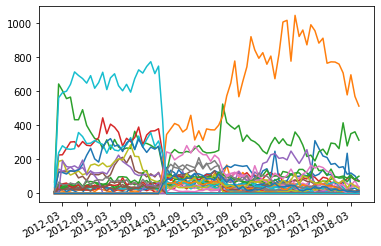

In [10]:
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(locator)

for cat in news_cats:
    label = cat.lower()
    label = label.capitalize()
    fake = [0]*len(month_dates)
    plt.plot(month_dates, freq_by_cat[cat], label=label)
    
# plt.legend()
plt.gcf().autofmt_xdate()

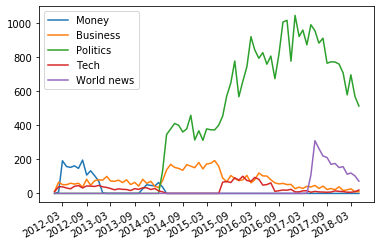

In [11]:
plt.cla()
plt.clf()
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(locator)

for cat in ['MONEY', 'BUSINESS', 'POLITICS', 'TECH', 'WORLD NEWS']:
    label = cat.lower()
    label = label.capitalize()
    plt.plot(month_dates, freq_by_cat[cat], label=label)
    
plt.legend()
plt.gcf().autofmt_xdate()

In [12]:
stock_data = [dict(r) for r in csv.DictReader(open('all_stocks_5yr.csv'))]
len(stock_data)

619040

In [13]:
stock_data[0]

{'date': '2013-02-08',
 'open': '15.07',
 'high': '15.12',
 'low': '14.63',
 'close': '14.75',
 'volume': '8407500',
 'Name': 'AAL'}

In [14]:
stock_set = set()
indiv_stock_data = defaultdict(list)
aggregate_price_dict = defaultdict(float)

for d in stock_data:
    stock_set.add(d['Name'])
    indiv_stock_data[d['Name']].append(d)
    
    date = datetime.datetime.strptime(d['date'], '%Y-%m-%d').date()
    aggregate_price_dict[date] += float(d['close'])

len(stock_set) # Some companies have multiple stocks

505

In [15]:
apple = indiv_stock_data['AAPL']
len(apple)

1259

In [16]:
trading_days = [d for d in aggregate_price_dict]
len(trading_days)

1259

In [17]:
trading_days.sort()
trading_days[:10]

[datetime.date(2013, 2, 8),
 datetime.date(2013, 2, 11),
 datetime.date(2013, 2, 12),
 datetime.date(2013, 2, 13),
 datetime.date(2013, 2, 14),
 datetime.date(2013, 2, 15),
 datetime.date(2013, 2, 19),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 2, 21),
 datetime.date(2013, 2, 22)]

In [18]:
aggregate_price = [aggregate_price_dict[d] for d in trading_days]

aggregate_price[1258]

54419.91499999999

In [19]:
(aggregate_price[len(apple) - 1] - aggregate_price[0]) / aggregate_price[0]

0.9587149114139736

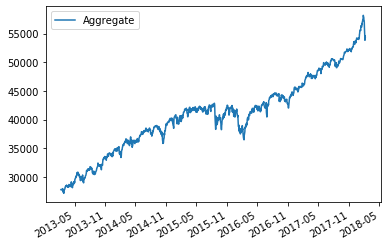

In [20]:
plt.cla()
plt.clf()
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(locator)

plt.plot(trading_days, aggregate_price, label='Aggregate')

    
plt.legend()
plt.gcf().autofmt_xdate()

In [21]:
aggregate_price[0], aggregate_price[len(aggregate_price)-1]

(27783.47920000001, 54419.91499999999)

In [22]:
(aggregate_price[len(aggregate_price)-1] - aggregate_price[0]), (aggregate_price[len(aggregate_price)-1] - aggregate_price[0]) / aggregate_price[0]

(26636.435799999985, 0.9587149114139736)

In [23]:
average = 0
for i in range(len(aggregate_price) - 1):
    average += (aggregate_price[i+1] - aggregate_price[i]) / aggregate_price[i]

average = average / (len(aggregate_price) - 1)
average

0.0005654887190763837

In [24]:
last_date = trading_days[len(trading_days)-1]
prev_price = aggregate_price[0]
curr_date = trading_days[0] + datetime.timedelta(days=1)
trading_days_set = set(trading_days)

valid_days = []
price_at_day = defaultdict(dict)
while curr_date <= last_date:
    price = prev_price
    prev = prev_price
    price_change = 0
    delta = 0
    if curr_date in trading_days_set:
        price = aggregate_price_dict[curr_date]
        delta = price - prev_price
        price_change = delta / prev_price
        prev_price = price
        
    price_at_day[curr_date] = {'prev': prev, 'curr': price, 'delta': delta, 'change': price_change}
    valid_days.append(curr_date)
    curr_date += datetime.timedelta(days=1)

In [25]:
valid_days_set = set(valid_days)
len(valid_days)

1825

In [26]:
combined_data = []

for d in news_data:
    date = datetime.datetime.strptime(d['date'], '%Y-%m-%d').date()
    if date in valid_days:
        datum = copy.deepcopy(d)
        datum['price_data'] = price_at_day[date]
        datum['date'] = date
        combined_data.append(datum)

In [27]:
len(combined_data)

159735

In [28]:
# random.shuffle(combined_data)
data = combined_data[:130000]

In [29]:
data[0]

{'category': 'QUEER VOICES',
 'headline': "Illinois GOP Rep. Doesn't Get Why Transphobic Ad Upset People",
 'authors': 'Curtis M. Wong',
 'link': 'https://www.huffingtonpost.com/entry/jeanne-ives-transphobic-campaign-ad_us_5a7b2078e4b07af4e820047c',
 'short_description': 'Rep. Jeanne Ives has defended her new commercial as "edgy" and "accurate."',
 'date': datetime.date(2018, 2, 7),
 'price_data': {'prev': 54625.42000000001,
  'curr': 54419.91499999999,
  'delta': -205.5050000000192,
  'change': -0.0037620763373539126}}

In [30]:
def change(datum):
    return datum['price_data']['change']

N = len(data)
train_end = N//2
valid_end = 3*N//4

y = [change(d) for d in data]
y_train = y[:train_end]
y_valid = y[train_end:valid_end]
y_test = y[valid_end:]

In [31]:
unigramCount = defaultdict(int)
bigramCount = defaultdict(int)
totalUnigrams = 0
totalBigrams = 0

In [32]:
punct = string.punctuation

In [33]:
for d in data:
    t = d['headline']
    t = t.lower() # lowercase string
    t = [c for c in t if not (c in punct)]
    t = ''.join(t) # convert back to string
    words = t.strip().split() # tokenizes
    
    if not words:
        continue
    
    totalUnigrams += 1
    unigramCount[words[0]] += 1
    
    for i in range(len(words) - 1):
        #w = stemmer.stem(w)
        totalUnigrams += 1
        unigramCount[words[i+1]] += 1
        
        bigram = words[i] + " " + words[i+1]
        totalBigrams += 1
        bigramCount[bigram] += 1

In [34]:
unigramPairs = [(unigramCount[w], w) for w in unigramCount]
bigramPairs = [(bigramCount[w], w) for w in bigramCount]

In [35]:
unigramPairs.sort()
unigramPairs.reverse()
bigramPairs.sort()
bigramPairs.reverse()

In [36]:
feature_len = 1000

In [37]:
unigrams = [w[1] for w in unigramPairs[:feature_len]]
bigrams = [w[1] for w in bigramPairs[:feature_len]]

In [38]:
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

In [39]:
unigramCount = defaultdict(int)
bigramCount = defaultdict(int)
totalUnigrams = 0
totalBigrams = 0

In [40]:
idfUniCounts = defaultdict(int)
idfBiCounts = defaultdict(int)

for d in data:
    t = d['headline']
    t = t.lower() # lowercase string
    t = [c for c in t if not (c in punct)] # non-punct characters
    t = ''.join(t) # convert back to string
    words = t.strip().split() # tokenizes
    
    if len(words) != 0:
        usedWords = set()
        if words[0] in unigramSet:
            idfUniCounts[words[0]] += 1
        usedWords.add(words[0])
        
        for i in range(len(words) - 1):
            if words[i+1] not in usedWords and words[i+1] in unigramSet:
                idfUniCounts[words[i+1]] += 1
                
            bi = words[i] + " " + words[i+1]
            if bi not in usedWords and bi in bigramSet:
                idfBiCounts[bi] += 1
            
            usedWords.add(words[i+1])
            usedWords.add(bi)

In [41]:
idfs_uni = defaultdict(float)
idfs_bi = defaultdict(float)

N = len(data)
for w in unigrams:
    idfs_uni[w] = math.log(N / idfUniCounts[w], 10)

for w in bigrams:
    idfs_bi[w] = math.log(N / idfBiCounts[w], 10)

In [42]:
def feature(datum, unigram, tfidf):
    feat = [0]*feature_len
    t = datum['headline']
    t = t.lower() # lowercase string
    t = [c for c in t if not (c in punct)]
    t = ''.join(t) # convert back to string
    words = t.strip().split() # tokenizes

    wordCounts = defaultdict(int)
    if unigram and not tfidf:
        for w in words:
            if w in unigramSet:
                feat[unigramId[w]] += 1
                
    elif unigram and tfidf:
        for w in words:
            if w in unigramSet:
                wordCounts[w] += 1
                
        for w in unigrams:
            feat[unigramId[w]] = wordCounts[w] * idfs_uni[w]
                
    elif not unigram and not tfidf:
        for i in range(len(words) - 1):
            bi = words[i] + " " + words[i+1]
            if bi in bigramSet:
                feat[bigramId[bi]] += 1
    else:
        for i in range(len(words) - 1):
            bi = words[i] + " " + words[i+1]
            if bi in bigramSet:
                wordCounts[bi] += 1
                
        for w in bigrams:
            feat[bigramId[w]] = wordCounts[w] * idfs_bi[w]

    feat.append(1)
    return feat

In [43]:
X_labels = []
X_train_list = []

for uni in [True, False]:
    for tf in [True, False]:
        label = ""
        label += "Uni-" if uni else "Bi-"
        label += "TFIDF" if tf else "Counts"
        X_labels.append(label)
        new_X = [feature(d, uni, tf) for d in data]
        X_train_list.append(new_X)

In [44]:
regs = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for X_name, X in zip(X_labels, X_train_list):
    X_train = X[:train_end]
    X_valid = X[train_end:valid_end]
    X_test = X[valid_end:]
    
    MSEs = []
    testMSEs = []
    for c in regs:
        model = linear_model.Ridge(c, fit_intercept=False)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_valid)
        MSEs.append(mean_squared_error(y_valid, y_pred))
        
        y_pred = model.predict(X_test)
        testMSEs.append(mean_squared_error(y_test, y_pred))
        
    bestIndex = MSEs.index(min(MSEs))
    bestC = regs[bestIndex]
    testMSE = testMSEs[bestIndex]
    
    result = X_name + ": "
    for i in range(len(regs)):
        result += f"{regs[i]}=>{MSEs[i]}, "
    
    result += f"best MSE: {bestC}=>{testMSE}\n"
    
    print(result)

Uni-TFIDF: 0.01=>6.458623619758232e-05, 0.1=>6.458609658388735e-05, 1=>6.458470313248448e-05, 10=>6.457103096491634e-05, 100=>6.445560471724093e-05, 1000=>6.401599270313849e-05, 10000=>6.369849083159416e-05, best MSE: 10000=>4.3124923511184655e-05

Uni-Counts: 0.01=>6.458614449712754e-05, 0.1=>6.458518095703804e-05, 1=>6.457568201382296e-05, 10=>6.449224118060723e-05, 100=>6.411651399999221e-05, 1000=>6.375868698512392e-05, 10000=>6.366621239555959e-05, best MSE: 10000=>4.3125529261291414e-05

Bi-TFIDF: 0.01=>6.516182870440643e-05, 0.1=>6.513196492010401e-05, 1=>6.49200027094128e-05, 10=>6.453118684400637e-05, 100=>6.426705591127713e-05, 1000=>6.384313855370198e-05, 10000=>6.366770444670801e-05, best MSE: 10000=>4.3124103027478146e-05

Bi-Counts: 0.01=>6.513813798962735e-05, 0.1=>6.495476805739037e-05, 1=>6.455106518786623e-05, 10=>6.428080744579599e-05, 100=>6.387317259682301e-05, 1000=>6.370103132029776e-05, 10000=>6.365547414092831e-05, best MSE: 10000=>4.312717253789732e-05



In [45]:
#baseline not really
first_date = datetime.datetime(2020,12,4).date()
for d in data:
    if d['date'] < first_date:
        first_date = date
        
X_baseline = [[(d['date'] - first_date).days, 1] for d in data]
X_baseline_train = X_baseline[:train_end]
X_baseline_valid = X_baseline[train_end:valid_end]
X_baseline_test = X_baseline[valid_end:]
model = linear_model.LinearRegression()
model.fit(X_baseline_train, y_train)

baseline_pred = model.predict(X_baseline_valid)
valid_mse = mean_squared_error(y_valid, baseline_pred)

baseline_pred = model.predict(X_baseline_test)
valid_mse, mean_squared_error(y_test, baseline_pred)

(6.362792687530687e-05, 4.375124850548878e-05)

In [46]:
total_sum = 0
for price in price_at_day:
    total_sum += price_at_day[price]['change']

mean_change = total_sum / len(price_at_day)
mean_change

0.00038979989512224144

In [47]:
#baseline for reals
baseline_pred = [mean_change] * len(y_valid)
valid_mse = mean_squared_error(y_valid, baseline_pred)

baseline_pred = [mean_change] * len(y_test)
valid_mse, mean_squared_error(y_test, baseline_pred)

(6.366373195609224e-05, 4.31241345306523e-05)

In [48]:
for X_name, X in zip(X_labels, X_train_list):
    X_train = X[:train_end]
    X_valid = X[train_end:valid_end]
    X_test = X[valid_end:]
    
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    MSE = (mean_squared_error(y_valid, y_pred))

    y_pred = model.predict(X_test)
    testMSE = (mean_squared_error(y_test, y_pred))
    
    print(f'{X_name}: MSE=>{MSE}, test MSE=>{testMSE}')

Uni-TFIDF: MSE=>6.458625171323628e-05, test MSE=>4.364471305022605e-05
Uni-Counts: MSE=>6.458625171323628e-05, test MSE=>4.364471305022605e-05
Bi-TFIDF: MSE=>6.516528029627801e-05, test MSE=>4.369814046904731e-05
Bi-Counts: MSE=>6.516528029627807e-05, test MSE=>4.369814046904731e-05


In [49]:
def change(datum):
    return datum['price_data']['change'] >= 0

N = len(data)
y = [change(d) for d in data]
y_train = y[:train_end]
y_valid = y[train_end:valid_end]
y_test = y[valid_end:]

In [50]:
regs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for X_name, X in zip(X_labels, X_train_list):
    X_train = X[:train_end]
    X_valid = X[train_end:valid_end]
    X_test = X[valid_end:]
    
    valid_accuracy = []
    test_accuracy = []
    for c in regs:
        model = linear_model.LogisticRegression(C=c, class_weight='balanced', max_iter=10000)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_valid)
        valid_accuracy.append(accuracy_score(y_valid, y_pred))
        
        y_pred = model.predict(X_test)
        test_accuracy.append(accuracy_score(y_test, y_pred))
        
    bestIndex = valid_accuracy.index(max(valid_accuracy))
    bestC = regs[bestIndex]
    testMSE = test_accuracy[bestIndex]
    
    result = X_name + ": "
    for i in range(len(regs)):
        result += f"{regs[i]}=>{valid_accuracy[i]}, "
    
    result += f"best score: {bestC}=>{testMSE}\n"
    
    print(result)

Uni-TFIDF: 1e-05=>0.544, 0.0001=>0.5444923076923077, 0.001=>0.5451076923076923, 0.01=>0.5402769230769231, 0.1=>0.5375384615384615, 1=>0.5362153846153846, 10=>0.5361846153846154, best score: 0.001=>0.567076923076923

Uni-Counts: 1e-05=>0.5476307692307693, 0.0001=>0.5401846153846154, 0.001=>0.5380615384615385, 0.01=>0.5444, 0.1=>0.5391384615384616, 1=>0.5370461538461538, 10=>0.5364615384615384, best score: 1e-05=>0.5696923076923077

Bi-TFIDF: 1e-05=>0.5675384615384615, 0.0001=>0.5771692307692308, 0.001=>0.5760923076923077, 0.01=>0.5757846153846153, 0.1=>0.573076923076923, 1=>0.575076923076923, 10=>0.5750153846153846, best score: 0.0001=>0.6008923076923077

Bi-Counts: 1e-05=>0.4327692307692308, 0.0001=>0.42455384615384617, 0.001=>0.4365230769230769, 0.01=>0.5769846153846154, 0.1=>0.5738153846153846, 1=>0.5732923076923077, 10=>0.5749230769230769, best score: 0.01=>0.6021846153846154



In [51]:
X_train = X_train_list[2][:train_end]
model = linear_model.LogisticRegression(C=c, class_weight='balanced', max_iter=10000)
model.fit(X_train, y_train)

news_headline = "Two Georgia educators die from Covid on the same day"
news_features = feature({'headline': news_headline}, False, True)
model.predict([news_features])

array([ True])

In [83]:
for X_name, X in zip(X_labels, X_train_list):
    X_train = X[:train_end]
    X_valid = X[train_end:valid_end]
    X_test = X[valid_end:]
    
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    valid_accuracy = (accuracy_score(y_valid, y_pred))

    y_pred = model.predict(X_test)
    test_accuracy = (accuracy_score(y_test, y_pred))
    
    result = f'{X_name} : validation=>{valid_accuracy}, test=>{test_accuracy}'
    
    print(result)

Uni-TFIDF : validation=>0.5335076923076923, test=>0.5326461538461539
Uni-Counts : validation=>0.5335076923076923, test=>0.5326461538461539
Bi-TFIDF : validation=>0.4025846153846154, test=>0.3872923076923077
Bi-Counts : validation=>0.4041230769230769, test=>0.3881230769230769


In [84]:
y_random = [random.randint(0,1) for d in data]
y_random_train = y_random[:train_end]
y_random_valid = y_random[train_end:valid_end]
y_random_test = y_random[valid_end:]

accuracy_score(y, y_random), accuracy_score(y_valid, y_random_valid), accuracy_score(y_test, y_random_test)

(0.49938461538461537, 0.4985538461538462, 0.49812307692307695)

In [ ]:
X = X_train_list[2]
X_train = X[:train_end]
X_valid = X[train_end:valid_end]
X_test = X[valid_end:]

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=10000000))
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_valid)
valid_accuracy = (accuracy_score(y_valid, y_pred))

y_pred = clf.predict(X_test)
test_accuracy = (accuracy_score(y_test, y_pred))

valid_accuracy, test_accuracy

# STOP HERE DON'T RUN THE RECOMMENDER

In [ ]:
def cosine(A, B):
    if len(A) != len(B):
        print('sumfin wrong fam')
        return 0
    
    dot = 0
    A_squared = 0
    B_squared = 0
    
    for i in range(len(A) - 1):
        dot += A[i] * B[i]
        A_squared += A[i] ** 2
        B_squared += B[i] ** 2
    
    A_mag = math.sqrt(A_squared)
    B_mag = math.sqrt(B_squared)
    denom = A_mag * B_mag
    
    if denom == 0:
        return 0
    
    return dot / denom

In [ ]:
data[0]

In [58]:
vectors = [feature(other, False, True) for other in data]

In [61]:
def mostSimilar(article):
    article_vect = feature(article, False, True)
    pairs = []
    for i in range(len(data)):
        if article['headline'] == data[i]['headline']:
            continue
        
        sim = cosine(vectors[i], article_vect)
        pairs.append((sim, data[i]['price_data']['change'], data[i]['headline']))
        
    pairs.sort()
    pairs.reverse()
    return pairs

In [68]:
news_headline = "Beyonce, Mariah Carey & More Wish Britney Spears a Happy 39th Birthday"
news_datum = {'headline': news_headline}

similar = mostSimilar(news_datum)

In [69]:
similar[:10]

[(1.0,
  0.013399666352665691,
  'Britney Spears Wears Couture To Announce Vegas Residency, Looks Very Un-Vegas (PHOTOS)'),
 (1.0,
  0.01001433779970317,
  "Gina Rodriguez Busts A Move With Britney Spears On Season 2 Of 'Jane The Virgin'"),
 (1.0,
  0.007090771846501042,
  'Britney Spears Schools Us In Sibling 101 With Surprise For Jamie Lynn'),
 (1.0,
  0.007049584956961759,
  "Emma Stone Debuts Oscar-Worthy Britney Spears Impression For Vogue's 73 Questions"),
 (1.0,
  0.00685588118401737,
  'Britney Spears Shines In Sparkling Silver Minidress At 2015 ESPYs'),
 (1.0,
  0.0052006273386243605,
  "Britney Spears Goes Brunette: Analyzing The 'Psychology' Of Changing Your Hair Color (PHOTOS)"),
 (1.0,
  0.0034883851087821687,
  'Britney Spears Signs On For Two More Years In Vegas'),
 (1.0,
  0.003131224721817215,
  "Britney Spears Gets Cozy With 'Jane The Virgin' Nemesis In Twitter Pic"),
 (1.0,
  0.0018628140705514958,
  "Britney Spears' Abs Are Your Monday Morning Workout Motivation"),


In [155]:
def similarityPredict(article):
    article_vect = feature(article, False, True)
#     pairs = []
    weighted_sum = 0
    similarities_sum = 0
    for i in range(len(data)):
        if article['headline'] == data[i]['headline']:
            continue
        
        sim = cosine(vectors[i], article_vect)
        similarities_sum += sim
        weighted_sum += sim * data[i]['price_data']['change']
#         pairs.append((sim, other['price_data']['change']))
        
#     pairs.sort()
#     pairs.reverse()

    if (similarities_sum > 0):
        return weighted_sum / similarities_sum
    else:
        return mean_change

In [156]:
start_time = time.time()
cosine(vectors[0], vectors[1])
time.time() - start_time

0.0005009174346923828

In [157]:
start_time = time.time()
feature(combined_data[N+2000], False, True)
time.time() - start_time

0.0005002021789550781

In [158]:
start_time = time.time()
similarityPredict(combined_data[N+2000])
time.time() - start_time

5.321499824523926

In [159]:
9*1000 / 60

150.0

In [160]:
test_set = combined_data[N:N+1000]

y_true = [d['price_data']['change'] for d in test_set]
y_pred = []

last_time = time.time()
for d in test_set:
    if len(y_pred) % 100 == 0:
        print(len(y_pred), time.time() - last_time)
        last_time = time.time()
    y_pred.append(similarityPredict(d))

0 0.0
100 528.3839993476868
200 528.3324983119965
300 528.3224990367889
400 528.2490000724792
500 528.4095003604889
600 528.1534998416901
700 529.0214998722076
800 528.6410000324249
900 528.5965003967285


In [161]:
len(y_pred), len(test_set), len(y_true)

(1000, 1000, 1000)

In [162]:
mean_squared_error(y_true, y_pred)

4.5051072165034954e-05

Notes: 
mse: 4.5051072165034954e-05
30000 articles; randomized

In [59]:
y_exp_true = [average]
y_exp_pred = [average + 0.005]
mean_squared_error(y_exp_true, y_exp_pred), average, average + 0.001

(2.5e-05, 0.0005654887190763837, 0.0015654887190763838)